# Regularization: Wine Quality

## Introduction
This project explores regularization (ridge and lasso) based on a logistic regression model to predict wine quality. 
Note: Project is based on Codecademy's [Regulatrization](https://www.codecademy.com/paths/fe-path-feature-engineering/tracks/fe-feature-selection-methods/modules/fe-regularization/projects/fe-logistic-regression-with-regularization) project. 

## Dataset
The dataset is red wine quality from UCI's [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality). Provided information includes fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, and more. 

## Set Up
The libraries are imported, and the dataset is read in. Datatypes all look reasonable and there seem to be no missing values. The quality of the wine is currently an ordinal variable between 1-10; it will be mapped to a binary column of 1 (good, >5 rating) and 0 (bad, <=5 rating) to enable logistic regression.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [18]:
df = pd.read_csv('winequality-red.csv', delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
# look at all possible quality ratings
print("Possible quality ratings: ", df["quality"].unique())

# map to 1 = good (>5 rating) or 0 = bad (<=5 rating)
df["quality"] = df["quality"].apply(lambda r: 1 if r > 5 else 0)
print("Possible quality ratings after binarization: ", df["quality"].unique())

Possible quality ratings:  [5 6 7 4 8 3]
Possible quality ratings after binarization:  [0 1]


## Data Preparation
The following steps are performed:
* data is split into feature and target variables 
* data is scaled
* data is split into training and testing data

In [24]:
# split into feature and target
y = df["quality"]

features = df.drop(columns=["quality"], axis=1)
predictors = features.columns

In [22]:
# transform data
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

In [23]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Logistic Regression Classifier (no regularization)
The baseline model will be a LR model with no regularization. The model will be evaluated through its training and test f1 score, and its coefficients will be plotted to compare with further models. 

In [31]:
# define and fit an LR model with no regularization
clf_no_reg = LogisticRegression(penalty = None) 
clf_no_reg.fit(X_train, y_train)

# evaluate model
noReg_trainScore = f1_score(y_train, clf_no_reg.predict(X_train))
noReg_testScore = f1_score(y_test, clf_no_reg.predict(X_test))
print(f"With no regularization, the train score is {noReg_trainScore}, and the test score is {noReg_testScore}.")

With no regularization, the train score is 0.7727598566308244, and the test score is 0.7266666666666667.


c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


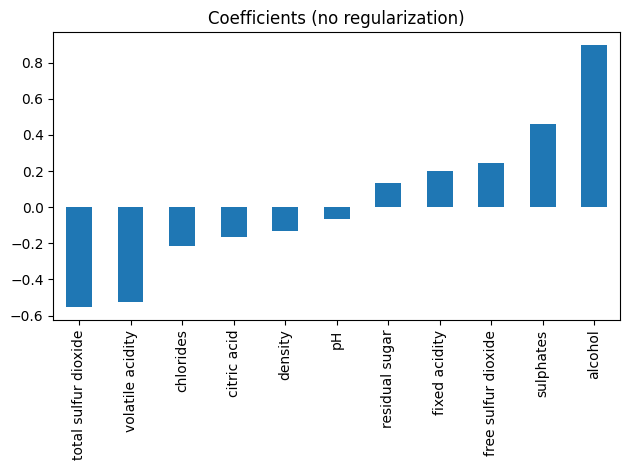

In [29]:
# plot coefficients
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()

## Logistic Regression Classifier (L2 regularization)
The next model will be a LR model with L2 regularization (default implementation). The model will be evaluated through its training and test f1 score. 

In [32]:
# define and fit an LR model with L2 reg
clf_l2 = LogisticRegression() 
clf_l2.fit(X_train, y_train)

# evaluate model
l2Reg_trainScore = f1_score(y_train, clf_l2.predict(X_train))
l2Reg_testScore = f1_score(y_test, clf_l2.predict(X_test))
print(f"With L2 regularization, the train score is {l2Reg_trainScore}, and the test score is {l2Reg_testScore}.")

With L2 regularization, the train score is 0.7727598566308244, and the test score is 0.7266666666666667.


As can be seen, the two models (with and without L2 regularization) have the same performance. This is because the constraint boundary for the regularization is large enough to hold the minimum of the original loss function, so the models end up being the same. 

### Hyperparameter tuning
To better see the effects of regularization, the `C` hyperparameter can be tuned (smaller values = more regularization). The default value is 1. 

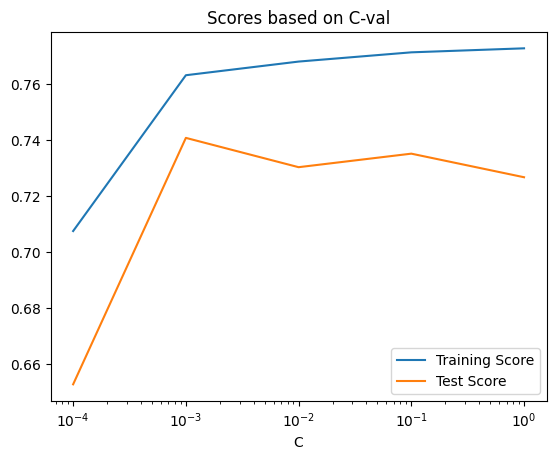

In [ ]:
# manual parameter tuning (to find coarse range)
training_array = []
test_array = []
# values of C to try (since we want more regularization than the default c=1, the values need to be < 1)
C_array = [0.0001, 0.001, 0.01, 0.1, 1] 

# loop through all C values, train model, and evaluate
for x in C_array:
    clf = LogisticRegression(C=x)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))

# plot training and test score as a value of C
plt.plot(C_array,training_array, label = 'Training Score')
plt.plot(C_array,test_array, label = 'Test Score')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.title("Scores based on C-val")
plt.show()